# Software Analytics Mini Tutorial Part II: pandas and matplotlib

## Introduction
This series of notebooks are a simple mini tutorial to introduce you to the basic functionality of Jupyter, Python, pandas and matplotlib. The comprehensive explanations should guide you to be able to analyze software data on your own. Therefore, the examples is chosen in such a way that we come across the typical methods in a data analysis. Have fun!

*This is part II: The basic of the data analysis framework pandas and the visualization library matplotlib. For Jupyter Notebook and Python basics, go to [the other tutorial](00%20Jupyter%20Notebook%20and%20Python%20basics.ipynb).*

## I. Stating Question
In this notebook, we want to take a closer look at the development history of the open source project "Linux" based on the history of the corresponding GitHub mirror repository.

**We want to find out which people are the TOP 10 contributors.**

## II. Exploratory Data Analysis

## The dataset

A local clone of the GitHub repository https://github.com/torvalds/linux/ was created by using the command  

```
git clone https://github.com/torvalds/linux.git
```

The relevant parts of the history for this analysis were produced by using

```
git log --pretty="%ad,%aN" --no-merges > git_log_linux_authors_timestamps.csv
```

This command returned the commit timestamp (`%ad`) and the author name (`%aN`) for each commit of the Git repository. The corresponding values are separated by commas. We also indicated that we do not want to receive merge commits (via `--no-merges`). The result of the output was saved in the file `git_log_linux_authors_timestamps.csv` and compressed for a optimized file size with `gzip` to the file `git_log_linux_authors_timestamps.gz`.

_Note: For an optimized demo, headers and the separator has been changed manually in the provided dataset to get through this analysis more easily. The differences can be seen at https://www.feststelltaste.de/developers-habits-linux-edition/, which was done with the original dataset._

### Getting to know pandas
Pandas is a data analysis tool written in Python (and C), which is perfect for the analysis of tabular data due to the use of effective data structures and built-in statistics functions. 

#### Load a module
1. import the module `pandas` with `import <module> as <abbreviation>` as abbreviated `pd`

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
import pandas as pd

#### Check loading of the right module

1. write `pd` and attach a `?` behind it
1. make the documentation disappear with the `Esc` key.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
pd?

#### Import dataset
1. use the `read_csv` method from pandas to read in the dataset `../datasets/git_log_linux_authors_timestamps.gz`.
1. write the result into the variable `log`.
1. display the first five entries of `log` with the `head()` method.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log = pd.read_csv("../datasets/git_log_linux_authors_timestamps.gz")
log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


#### Getting to know the data
1. call `info()` on `log`.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723214 entries, 0 to 723213
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  723214 non-null  object
 1   author     723213 non-null  object
dtypes: object(2)
memory usage: 11.0+ MB


#### A glimpse at the result

We see that `log` is 
* a **DataFrame** that consists of
  * 723214 **entries** (also called **rows**)
  * 2 **columns** (so-called **Series**): `timestamp` and `author`


#### Access a Series
1. access the Series `author` by either
 * using the `['<column name>']` notation or
 * by directly using the name of the `Series`*.
1. display the last five entries by using the `tail()` method

 
**A word of caution: In this tutorial, we access a Series directly with the `.<Series name>` notation (e. g. `log.author`). This works only if the names of the Series are different from the provided functions and properties of a Series. E. g. it doesn't work, when you try to access a Series named `count`, because `count()` is a function of a Series. Here, you have to use the `['<Series name>']` notation (e.g. `log['count']`. The benefit of the direct access is that you are able to use auto completion (which is good at the beginning). The drawback is creating a source of potential future problems when pandas evolves and gets new functions and properties that are in conflict with your column names.*

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log.author.tail()

723209        akpm@osdl.org
723210        akpm@osdl.org
723211           Neil Brown
723212    Christoph Lameter
723213       Linus Torvalds
Name: author, dtype: object

##### Discussion: Think a little bit about possible data quality issues in this dataset.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

*Possible answers:*

* Some authors have an email address as name
* There could be multiple names for one person

## III. Formal Modeling

### Top 10 authors
#### Execute a method of a Series
1. count the number of the occuring author names with the method `value_counts()`.
1. save the result in the variable `top10`*.
1. list the first ten results of `top10`.

**Note: Normally we would choose a more expressive name like `top10_contributors` to make sure we and others now what's in the variable. But in a tutorial, we don't want keep things short.*

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
top10 = log.author.value_counts().head(10)
top10

Linus Torvalds           24259
David S. Miller           9563
Mark Brown                6917
Takashi Iwai              6293
Al Viro                   6064
H Hartley Sweeten         5942
Ingo Molnar               5462
Mauro Carvalho Chehab     5384
Arnd Bergmann             5305
Greg Kroah-Hartman        4687
Name: author, dtype: int64

## IV. Interpretation

##### Discussion

Discuss the result:
* Which insights does this list provided?
* Which fallacies chould exist?
* Do you find anything awkward?

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

*Possible answers:*

* Linux Torvalds has too many commits (Reason: In 2005, he copied the original repository to GitHub without keeping the existing history).
* We ignored different commit habits of developers. Some may commit just once a week. Others maybe several times a day.
* It's unclear what "actionable insights" are that impact our daily work (Patience, please, we're just getting started. :-) ).

## V. Communication

Next, we want to visualize or plot the result. To display the plotting result of the internally used plotting library `matplotlib` directly in the notebook. This needs to be configured.

#### Plot diagram
1. create a diagram of the Series `top10` with `plot()`.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

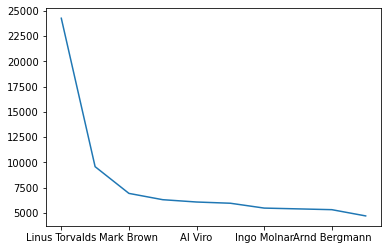

In [ ]:
top10.plot()

##### Discussion: What does this visualization display? Is it appropriate? Why and why not?

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

*Possible answers:*

* A line chart is the wrong representation for this kind of data.
* There is no information what the axes mean.
* The x-axis is missing values.


#### Create a bar chart
1. call the `bar()` sub-method of `plot` for the data in `top10`.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

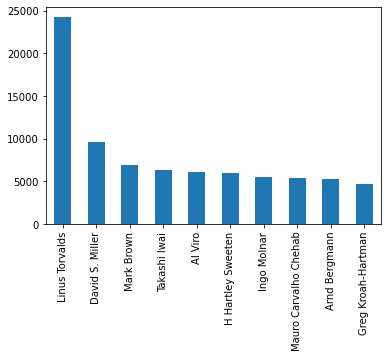

In [ ]:
top10.plot.bar()

#### Improve the  output
1. add a `;` to the call above and re-execute it.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

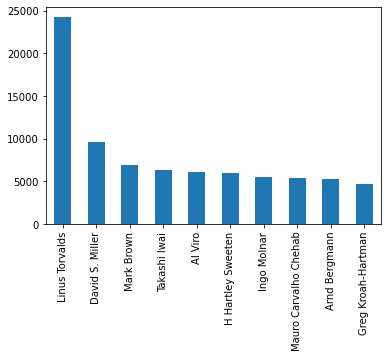

In [ ]:
top10.plot.bar();

##### Question

* What has changed?

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

*Possible answer:*

* The cryptic output text `<matplotlib.axes._subplots.AxesSubplot at ...` is no longer printed (which makes our notebook looking nicer now).

#### Create a pie chart

This data can also be visualized as a pie chart (which is a rare occasion and should be, because pie charts are evil).


1. call the `pie()` sub-method of `plot` for the data in `top10`.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

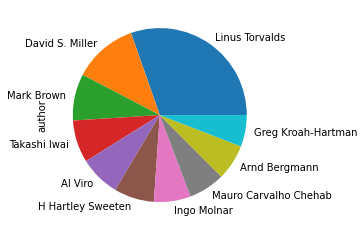

In [ ]:
top10.plot.pie();

##### Discussion: Why are pie charts considered harmful?

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

*Possible answers:*

* Comparing between entries within a pie chart is not easy
* Comparing the values between different pie charts is very hard (especially when colors changed)

#### Create a more beautiful pie chart (nevertheless)

1. create another pie chart, this time directly with `plot()` of the Series `top10` and with the following parameters:  
 * `kind="pie"`
 * `figsize=[5,5]`
 * `title="Top 10 Contributors"`
 * `label=""`  

Tip: Use auto completion.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

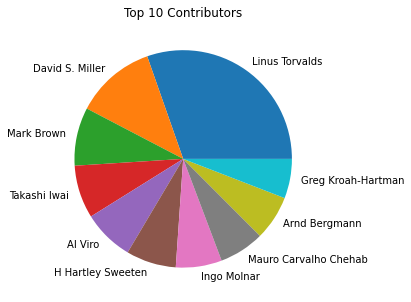

In [ ]:
top10.plot.pie(
    figsize=[5,5],
    title="Top 10 Contributors",
    label="");

## Summary
This was a complete walkthrough through the basics of Jupyter Notebook, Python, pandas and matplotlib. The next session introduces you a little more advanced techniques where you get to know the power of this stack by using time series analysis! Please proceed to [the next section](20%20Time%20Series%20and%20Grouping.ipynb)

If you want to dive deeper into this topic, take a look at my [blog posts on that topic](http://www.feststelltaste.de/category/software-analytics/) or my microsite [softwareanalytics.de](https://softwareanalytics.de/). I'm looking forward to your comments and feedback on [GitHub](https://github.com/feststelltaste/software-analytics-workshop/issues) or on [Twitter](https://www.twitter.com/feststelltaste)!